<a href="https://colab.research.google.com/github/AoShuang92/baysian_NN/blob/main/naive_bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
X, y = make_blobs(n_samples=20, centers=[(0,0), (5,5), (-5, 5)], random_state=0)
print(y)
print(X)

[2 0 0 0 1 1 0 1 2 2 2 1 0 2 1 0 1 1 0 2]
[[-5.34791215  5.15634897]
 [ 0.14404357  1.45427351]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 5.3130677   4.14590426]
 [ 5.44386323  5.33367433]
 [ 1.76405235  0.40015721]
 [ 6.49407907  4.79484174]
 [-5.88778575  3.01920353]
 [-3.76970932  6.20237985]
 [-5.38732682  4.69769725]
 [ 5.04575852  4.81281615]
 [ 0.76103773  0.12167502]
 [-4.84505257  5.37816252]
 [ 5.8644362   4.25783498]
 [-0.10321885  0.4105985 ]
 [ 2.44701018  5.6536186 ]
 [ 7.26975462  3.54563433]
 [ 0.95008842 -0.15135721]
 [-3.46722079  6.46935877]]


In [ ]:
np.bincount(y) / len(y) # bincount: count number of occurance of each y

array([0.35, 0.35, 0.3 ])

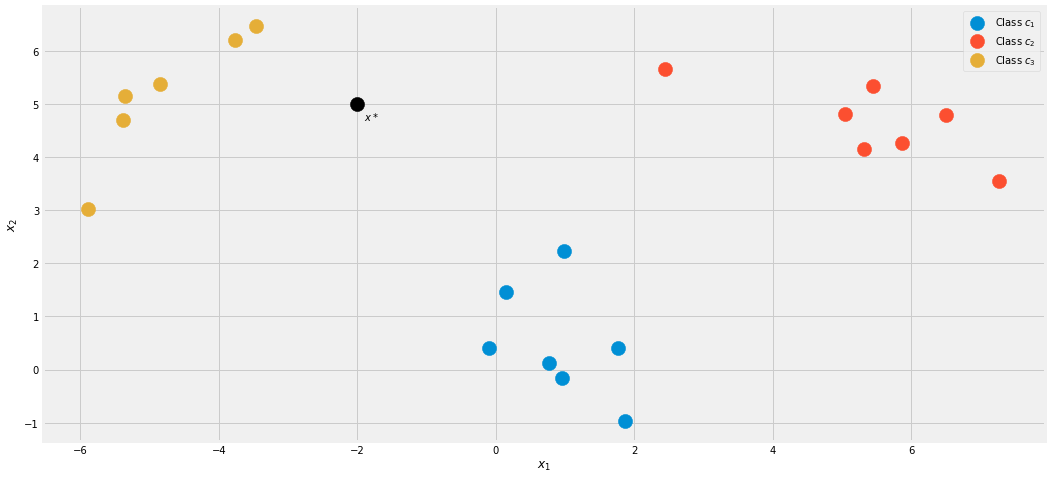

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200, label=f'Class $c_{i+1}$')
plt.scatter([-2], [5], c='k', s=200)
plt.annotate('$x*$', (-1.9, 4.7))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [ ]:
class GaussianNaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.priors_ = np.bincount(y) / len(y)
        self.n_classes_ = np.max(y) + 1
        
        self.means_ = np.array([X[np.where(y==i)].mean(axis=0) for i in range(self.n_classes_)])
        self.stds_ = np.array([X[np.where(y==i)].std(axis=0) for i in range(self.n_classes_)])
        
        
        return self
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for i in range(len(X)):
            probas = []
            for j in range(self.n_classes_):
                probas.append((1/np.sqrt(2*np.pi*self.stds_[j]**2)*np.exp(-0.5*((X[i]-self.means_[j])/self.stds_[j])**2)).prod()*self.priors_[j])
            probas = np.array(probas)
            res.append(probas / probas.sum())
            
        
        return np.array(res)
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)

In [ ]:

my_gauss = GaussianNaiveBayesClassifier()
my_gauss.fit(X, y)
my_gauss.predict_proba([[-2, 5], [0,0], [6, -0.3]])

array([[8.06313823e-07, 1.36201957e-04, 9.99862992e-01],
       [1.00000000e+00, 4.23258691e-14, 1.92051255e-11],
       [4.30879705e-01, 5.69120295e-01, 9.66618838e-27]])

In [ ]:
my_gauss.predict([[-2, 5], [0,0], [6, -0.3]])

array([2, 0, 1])

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=0)
gnb.fit(X, y)
gnb.predict_proba([[-2, 5], [0,0], [6, -0.3]])

array([[8.06313823e-07, 1.36201957e-04, 9.99862992e-01],
       [1.00000000e+00, 4.23258691e-14, 1.92051255e-11],
       [4.30879705e-01, 5.69120295e-01, 9.66618838e-27]])

In [ ]:
gnb.predict([[-2, 5], [0,0], [6, -0.3]])

array([2, 0, 1])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Decision Regions')

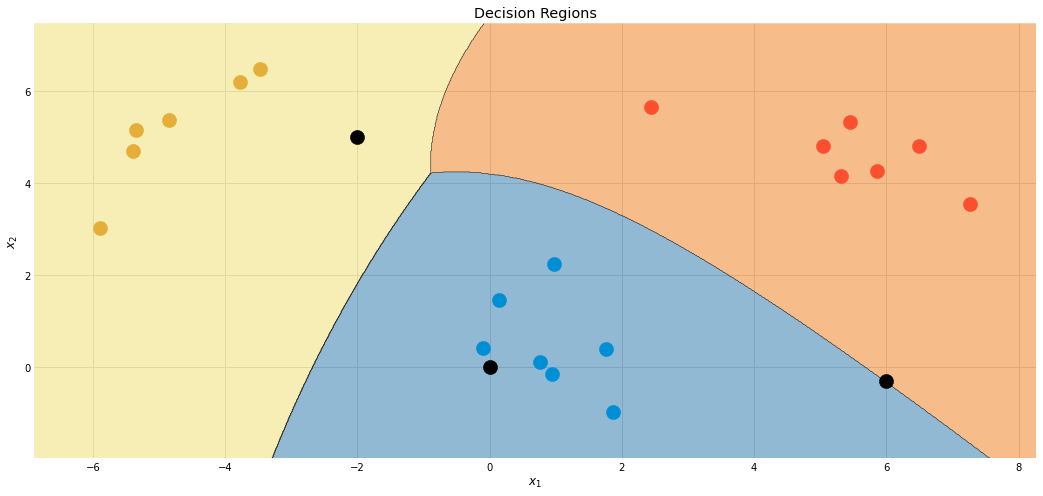

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(16, 8))
plot_decision_regions(X, y, clf=gnb, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200)
plt.scatter([-2, 0, 6], [5, 0, -0.3], c='k', s=200)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Regions')

In [ ]:
import torch.nn as nn

class newway_torch(nn.Module):
    def __init__ (self, in_size=None,hid_size=None, out_size=None):
        super(newway_torch,self).__init__()
        self.linear=nn.Linear(in_size,hid_size)
        self.hidden=nn.Linear(hid_size,hid_size)
        self.out= nn.Linear(hid_size,out_size)
    def forward(self,x):
        output = self.linear(x)
        output = self.hidden(output)
        output = self.out(output)
        return output #.argmax(axis=1)

In [ ]:
model = newway_torch(2, 10, 3)

In [ ]:
import torch
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.1)
criterion = nn.CrossEntropyLoss()

In [ ]:
model
input = torch.Tensor(X)
gt = torch.Tensor(y)
len(input), len(gt)

(20, 20)

In [ ]:
epochs=5
cost = 0
for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    pred = model(input)
    #print(type(pred), type(gt))
    gt = gt.long()
    loss = criterion(pred, gt)
    loss.backward()
    optimizer.step()
    cost +=loss.item()

In [ ]:
import torch
input = torch.Tensor(X)
prediction = model(input)
preds = prediction.argmax(axis=1)

In [ ]:
(preds == gt).sum()/len(preds)

tensor(0.8500)

In [ ]:
class pred ():
    def __init__ (self, model):
        super(pred,self).__init__() 
        self.model = model

    def predict(self,X):
        input = torch.Tensor(X)
        output = self.model (input)
        final = output.argmax(axis=1)
        return np.asarray(final)

In [ ]:
final_pred = pred(model)
final_pred.predict(X)

array([2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Decision Regions')

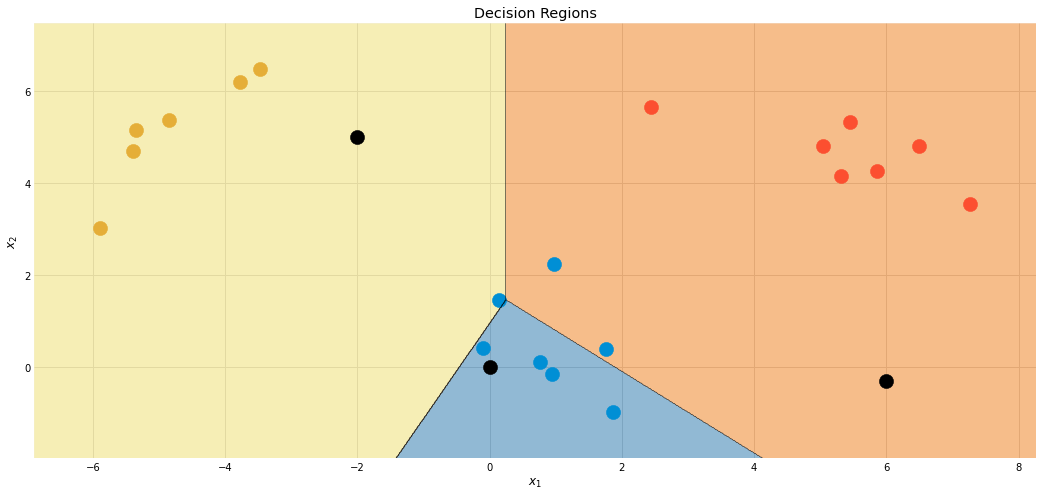

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(16, 8))
plot_decision_regions(X, y, clf=final_pred, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200)
plt.scatter([-2, 0, 6], [5, 0, -0.3], c='k', s=200)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Regions')